# U.S. Medical Insurance Costs

Goal of this project: Analyze the dataset to assess potential trends and draw conclusions to aid business decisions.

First, the appropriate libraries must be imported in order to import and inspect the CSV data.

In [2]:
import pandas as pd
import csv
import numpy as np
from matplotlib import pyplot as plt

The next step is to make sure the data is tidy.

The three main things to look for with data tidiness are as follows:

- Each variable forms a column and contains values
  (a variable is a measurement or an attribute, and the value is the measurement itself)
  
- Each observation forms a row and measures on the same unit
  (All values on each row should be measurements for one patient)
  
- Each type of observational unit forms a table
  (The observational unit is patients with insurance)

In [3]:
insurance_df = pd.read_csv('insurance.csv') 
# Imports csv using pandas so data can be read

pd.set_option('display.max_rows', len(insurance_df))
# Allows every row of dataframe to be visisble

display(insurance_df.head())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Upon visual inspection, the dataset adheres to the rules of tidiness and there is no obvious missing or abnormal data.
Now is a good time to get more information about the dataframe to make sure the data is clean. Some useful information to look for is:
- Dimensionality of the dataframe
- Any null or empty values
- Names of the columns
- Obvious abnormalities in values

In [4]:
insurance_df.info() 
# Provides dataframe dimensionality, column data types, and shows if there are any null values in each column.

insurance_df.empty
# Displays whether there are any empty values in the dataframe.

insurance_df.describe(include='all')
# Provides an overview of basic statistics and allows inspection for any potential abnormalities.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


Upon further inspection, there are no empty or obviously abnormal values in the data. The minimum and maximum values, frequencies, and number of uniques in the data all fall within reasonable ranges. Now a proper analysis may begin.

The information that will be looked for is as follows:
- Number of men and women that are patients.
- Average age, bmi, number of children, and charges billed by health insurance of male and female patients, and combined averages.
- Percent of men and women that smoke, and percentage of everyone that smokes.
- Most common region for male and female patients, and most common overall.
- Which region has the highest BMI, children, number of smokers? Is this noticably different than other regions?
- Which region has the highest average charges?

### Number of men and women that are patients:

In the results of the insurance_df.describe statement performed above, it shows the most common value is male with 676 entries. There are also 1338 total entries, and with that information the number of female patients can be calculated.

There are 676 male patients.
There are 662 female patients.

The data consists of 50.52 % male patients and 49.48 % female patients.


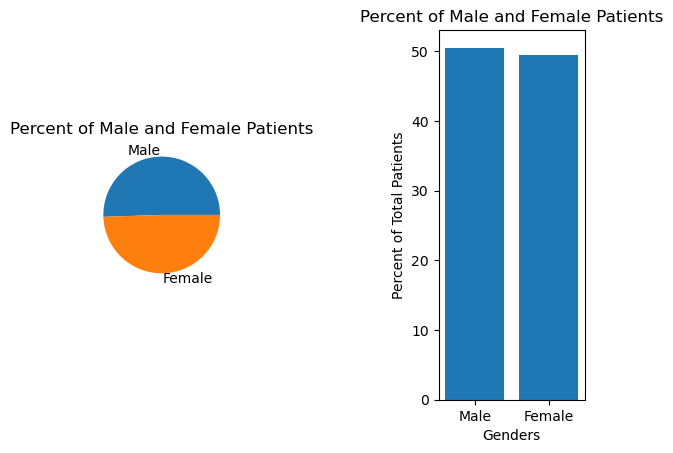

<Figure size 640x480 with 0 Axes>

In [5]:
num_total_patients = 1338
num_male_patients = 676
num_female_patients = num_total_patients - num_male_patients

print('There are {} male patients.'.format(num_male_patients))
print('There are {} female patients.\n'.format(num_female_patients))

pct_male_patients = (num_male_patients / num_total_patients) * 100
pct_male_patients = round(pct_male_patients, 2)
pct_female_patients = (num_female_patients / num_total_patients) * 100
pct_female_patients = round(pct_female_patients, 2)

print('The data consists of {} % male patients and {} % female patients.'.format(pct_male_patients, pct_female_patients))

#This code block is for the pie chart.
gender_num_data = [pct_male_patients, pct_female_patients]
labels = ['Male', 'Female']
sizes = gender_num_data
plt.subplot(1, 3, 1)
plt.pie(sizes, labels = labels)
plt.title('Percent of Male and Female Patients')

#This code block is for the bar chart
plt.subplot(1, 3, 3)
plt.bar(labels, gender_num_data)
plt.title('Percent of Male and Female Patients')
plt.xlabel('Genders')
plt.ylabel('Percent of Total Patients')
plt.show()
plt.clf()

### Average statistics of male and female patients

#### Average Age

The average age for male patients is 38.92 years.
The average age for female patients is 39.5 years.
The average age for all patients is 39.21 years.


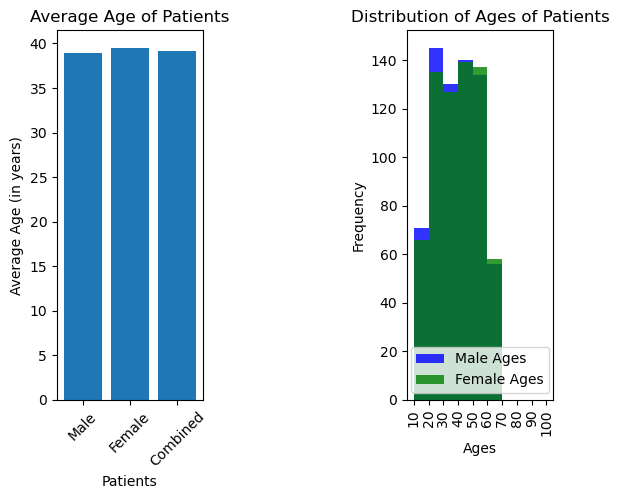

<Figure size 640x480 with 0 Axes>

In [6]:
male_ages = insurance_df['age'][insurance_df['sex'] == 'male']
female_ages = insurance_df['age'][insurance_df['sex'] == 'female']

male_avg_age = np.average(male_ages)
female_avg_age = np.average(female_ages)

all_avg_age = np.average(insurance_df['age'])

print('The average age for male patients is {} years.'.format(round(male_avg_age, 2)))
print('The average age for female patients is {} years.'.format(round(female_avg_age, 2)))
print('The average age for all patients is {} years.'.format(round(all_avg_age, 2)))

#This code block is for the bar chart
plt.subplot(1, 3, 1)
plt.bar(['Male', 'Female', 'Combined'], [male_avg_age, female_avg_age, all_avg_age])
plt.title('Average Age of Patients')
plt.xlabel('Patients')
plt.ylabel('Average Age (in years)')
plt.xticks(rotation = 45)

#This code block is for the histogram
plt.subplot(1, 3, 3)
plt.hist(male_ages, alpha = 0.8, bins=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100], label = 'Male Ages', color = 'blue')
plt.hist(female_ages, alpha = 0.8, bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], label='Female Ages', color = 'green')
plt.legend(loc = 'lower center')
plt.title('Distribution of Ages of Patients')
plt.xticks([10, 20, 30, 40, 50, 60, 70, 80, 90, 100], rotation = 90)
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.show()
plt.clf()

#### Average BMI

The average bmi of all patients is 30.66339686098655 bmi.
The average bmi of male patients is 30.943128698224854 bmi.
The average bmi of female patients is 30.37774924471299 bmi.


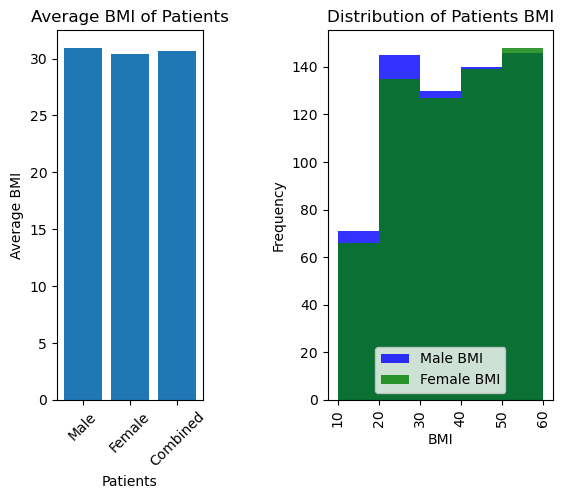

<Figure size 640x480 with 0 Axes>

In [7]:
all_bmi = insurance_df['bmi']
male_bmi = insurance_df['bmi'][insurance_df['sex'] == 'male']
female_bmi = insurance_df['bmi'][insurance_df['sex'] == 'female']

avg_total_bmi = np.average(all_bmi)
avg_male_bmi = np.average(male_bmi)
avg_female_bmi = np.average(female_bmi)

print('The average bmi of all patients is {} bmi.'.format(avg_total_bmi))
print('The average bmi of male patients is {} bmi.'.format(avg_male_bmi))
print('The average bmi of female patients is {} bmi.'.format(avg_female_bmi))

#This code block is for the bar chart
plt.subplot(1, 3, 1)
plt.bar(['Male', 'Female', 'Combined'], [avg_male_bmi, avg_female_bmi, avg_total_bmi])
plt.title('Average BMI of Patients')
plt.xlabel('Patients')
plt.ylabel('Average BMI')
plt.xticks(rotation = 45)

#This code block is for the histogram
plt.subplot(1, 2, 2)
plt.hist(male_ages, alpha = 0.8, bins=[10, 20, 30, 40, 50, 60], label = 'Male BMI', color = 'blue')
plt.hist(female_ages, alpha = 0.8, bins = [10, 20, 30, 40, 50, 60], label='Female BMI', color = 'green')
plt.legend(loc = 'lower center')
plt.title('Distribution of Patients BMI')
plt.xticks([10, 20, 30, 40, 50, 60], rotation = 90)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()
plt.clf()

#### Average Number of Children

The average number of children for all patients (including those that are not parents) is 1.0949177877429.
The average number of children for all patients that are parents is 1.92.
The average number of children for male patients that are parents is 1.93.
The average number of children for female patients that are parents is 1.91.


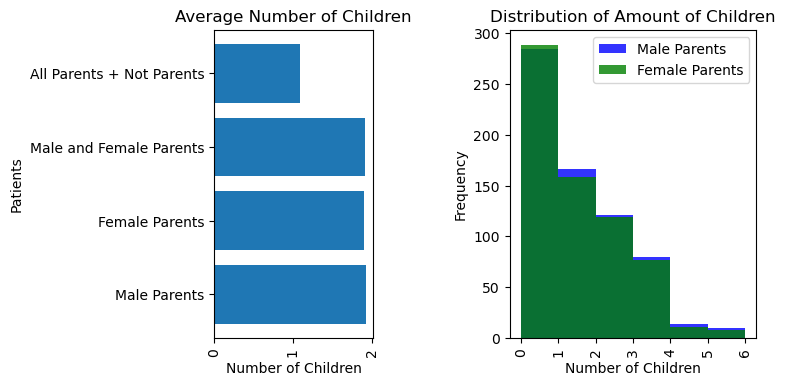

<Figure size 640x480 with 0 Axes>

In [8]:
# This function filters out results of patients that are not parents so it does not skew our data.
def avg_children_if_parent(sex):
    new_list = []
    if sex == 'all':
        for count in insurance_df['children']:
            if count!= 0:
                new_list.append(count)
        return np.average(new_list)
        new_list = []
    else:
        for count in insurance_df['children'][insurance_df['sex'] == sex]:
            if count != 0:
                new_list.append(count)
        return np.average(new_list)
        new_list = []

num_children_male = insurance_df['children'][insurance_df['sex'] == 'male']
num_children_female = insurance_df['children'][insurance_df['sex'] == 'female']

avg_children_inc_not_parents = np.average(insurance_df['children'])
avg_children_all_parents = avg_children_if_parent('all')
avg_children_male = avg_children_if_parent('male')
avg_children_female = avg_children_if_parent('female')

print('The average number of children for all patients (including those that are not parents) is {}.'.format(avg_children_inc_not_parents))
print('The average number of children for all patients that are parents is {}.'.format(round(avg_children_all_parents, 2)))
print('The average number of children for male patients that are parents is {}.'.format(round(avg_children_male, 2)))
print('The average number of children for female patients that are parents is {}.'.format(round(avg_children_female, 2)))

#This code block is for the bar chart
plt.figure(figsize = (7,4))
plt.subplot(1, 3, 1)

plt.barh(['Male Parents', 'Female Parents', 'Male and Female Parents', 'All Parents + Not Parents'], [avg_children_male, avg_children_female, avg_children_all_parents, avg_children_inc_not_parents])
plt.title('Average Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Patients')
plt.xticks(rotation = 90)

#This code block is for the histogram
plt.subplot(1, 2, 2)
plt.hist(num_children_male, alpha = .8, bins=[0, 1, 2, 3, 4, 5, 6], label = 'Male Parents', color = 'blue')
plt.hist(num_children_female, alpha = .8, bins = [0, 1, 2, 3, 4, 5, 6], label='Female Parents', color = 'green')

plt.legend(loc = 'upper right')
plt.title('Distribution of Amount of Children')
plt.xticks([0, 1, 2, 3, 4, 5, 6], rotation = 90)
plt.xlabel('Number of Children')
plt.ylabel('Frequency')

plt.show()
plt.clf()

#### Average Charges Billed by Health Insurance

The average charge to health insurance for all patients is $13270.42.
The average charge to health insurance for male patients is $13956.75.
The average charge to health insurance for female patients is $12569.58


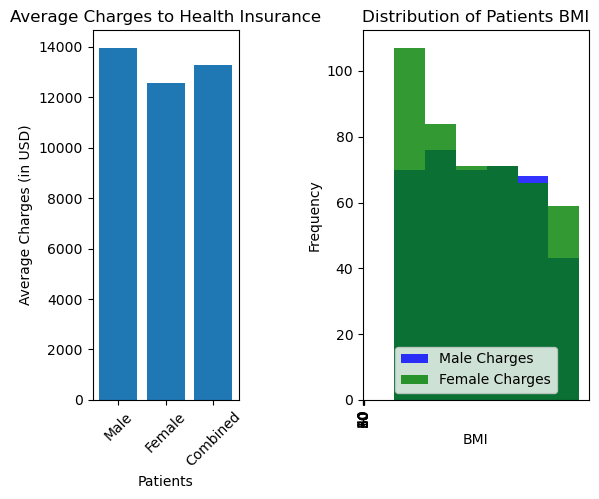

<Figure size 640x480 with 0 Axes>

In [9]:
charges_all = insurance_df['charges']
charges_male = insurance_df['charges'][insurance_df['sex'] == 'male']
charges_female = insurance_df['charges'][insurance_df['sex'] == 'female']

avg_charges_all = np.average(charges_all)
avg_charges_male = np.average(charges_male)
avg_charges_female = np.average(charges_female)

print('The average charge to health insurance for all patients is ${}.'.format(round(avg_charges_all, 2)))
print('The average charge to health insurance for male patients is ${}.'.format(round(avg_charges_male, 2)))
print('The average charge to health insurance for female patients is ${}'.format(round(avg_charges_female, 2)))

#This code block is for the bar chart
plt.subplot(1, 3, 1)
plt.bar(['Male', 'Female', 'Combined'], [avg_charges_male, avg_charges_female, avg_charges_all])
plt.title('Average Charges to Health Insurance')
plt.xlabel('Patients')
plt.ylabel('Average Charges (in USD)')
plt.xticks(rotation = 45)

#This code block is for the histogram
plt.subplot(1, 2, 2)
plt.hist(charges_male, alpha = .8, bins=[2000, 4000, 6000, 8000, 10000, 12000, 14000], label = 'Male Charges', color = 'blue')
plt.hist(charges_female, alpha = .8, bins = [2000, 4000, 6000, 8000, 10000, 12000, 14000], label='Female Charges', color = 'green')
plt.legend(loc = 'lower center')
plt.title('Distribution of Patients BMI')
plt.xticks([10, 20, 30, 40, 50, 60], rotation = 90)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()
plt.clf()

#### Percentage of Men, Women, and Total Patients That Smoke.

There are 159 male smokers. 23.52 percent of male patients are smokers.
There are 115 female smokers. 17.37 percent of female patients are smokers.
There are 274 total smokers. 20.48 percent of all patients are smokers.


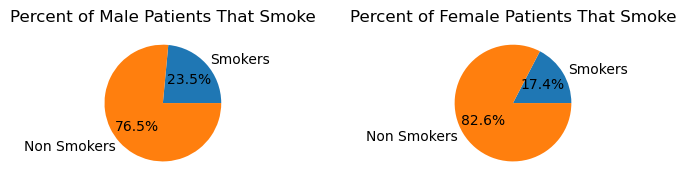

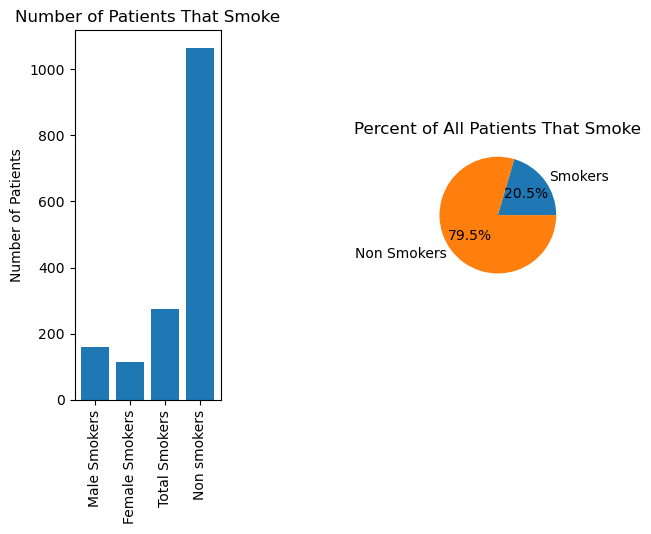

<Figure size 640x480 with 0 Axes>

In [10]:
num_male_smokers = insurance_df['smoker'][insurance_df['sex'] == 'male'].value_counts()['yes']
num_male_non_smokers = insurance_df['smoker'][insurance_df['sex'] == 'male'].value_counts()['no']

num_female_smokers = insurance_df['smoker'][insurance_df['sex'] == 'female'].value_counts()['yes']
num_female_non_smokers = insurance_df['smoker'][insurance_df['sex'] == 'female'].value_counts()['no']

num_total_smokers = (num_male_smokers + num_female_smokers)
num_non_smokers = insurance_df['smoker'].value_counts()['no']

percent_male_smokers = (num_male_smokers / num_male_patients) * 100
percent_male_non_smokers = (num_male_non_smokers / num_male_patients) * 100

percent_female_smokers = (num_female_smokers / num_female_patients) * 100
percent_female_non_smokers = (num_female_non_smokers / num_female_patients) * 100

percent_total_smokers = (num_total_smokers / num_total_patients) * 100
percent_total_non_smokers = (num_non_smokers / num_total_patients) * 100

print('There are {} male smokers. {} percent of male patients are smokers.'.format(num_male_smokers, round(percent_male_smokers, 2)))
print('There are {} female smokers. {} percent of female patients are smokers.'.format(num_female_smokers, round(percent_female_smokers, 2)))
print('There are {} total smokers. {} percent of all patients are smokers.'.format(num_total_smokers, round(percent_total_smokers, 2)))

#This code block is for the first pie chart.
labels = ['Smokers', 'Non Smokers']
sizes = [percent_male_smokers, percent_male_non_smokers]
plt.subplot(1, 3, 1)
plt.pie(sizes, labels = labels, autopct='%1.1f%%')
plt.title('Percent of Male Patients That Smoke')

#This code block is for the second pie chart.
labels = ['Smokers', 'Non Smokers']
sizes = [percent_female_smokers, percent_female_non_smokers]
plt.subplot(1, 3, 3)
plt.pie(sizes, labels = labels, autopct='%1.1f%%')
plt.title('Percent of Female Patients That Smoke')
plt.show()
plt.clf()

#This code block is for the bar chart.
labels = ['Male Smokers', 'Female Smokers', 'Total Smokers', 'Non smokers']
sizes = [num_male_smokers, num_female_smokers, num_total_smokers, num_non_smokers]
plt.subplot(1, 3, 1)
plt.bar(labels, sizes)
plt.title('Number of Patients That Smoke')
plt.ylabel('Number of Patients')
plt.xticks(rotation=90)

#This code block is for the third pie chart.
labels = ['Smokers', 'Non Smokers']
sizes = [percent_total_smokers, percent_total_non_smokers]
plt.subplot(1, 3, 3)
plt.pie(sizes, labels = labels, autopct='%1.1f%%')
plt.title('Percent of All Patients That Smoke')
plt.show()
plt.clf()

#### Most Common Regions for Patients

In [11]:
male_regions_count = insurance_df['region'][insurance_df['sex'] == 'male'].value_counts()
female_regions_count = insurance_df['region'][insurance_df['sex'] == 'female'].value_counts()
all_patients_regions_count = insurance_df['region'].value_counts()
print('The most common regions male patients are from are:')
print(male_regions_count, '\n')

print('The most common regions female patients are from are:')
print(female_regions_count, '\n')

print('The most common regions all paitents are from are:')
print(all_patients_regions_count)

The most common regions male patients are from are:
southeast    189
northeast    163
southwest    163
northwest    161
Name: region, dtype: int64 

The most common regions female patients are from are:
southeast    175
northwest    164
southwest    162
northeast    161
Name: region, dtype: int64 

The most common regions all paitents are from are:
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


#### Region With Highest Average BMI

The region that contains the highest average bmi is the southeast region with an average of 33.36 bmi.


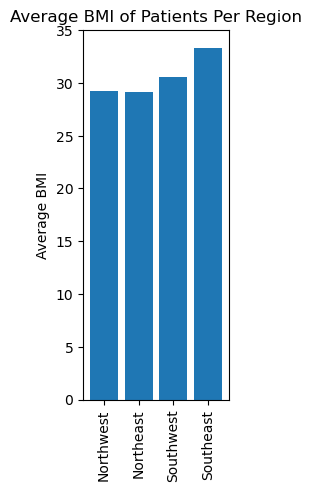

<Figure size 640x480 with 0 Axes>

In [26]:
#The following function will display how many total occurences of each region exist.
#print(insurance_df['region'].value_counts())

nw_avg_bmi = round(sum(insurance_df['bmi'][insurance_df['region'] == 'northwest']) / 325, 2)
ne_avg_bmi = round(sum(insurance_df['bmi'][insurance_df['region'] == 'northeast']) / 324, 2)
sw_avg_bmi = round(sum(insurance_df['bmi'][insurance_df['region'] == 'southwest']) / 325, 2)
se_avg_bmi = round(sum(insurance_df['bmi'][insurance_df['region'] == 'southeast']) / 364, 2)

print('The region that contains the highest average bmi is the {} region with an average of {} bmi.'.format('southeast', se_avg_bmi))

#This code block is for the bar chart.
labels = ['Northwest', 'Northeast', 'Southwest', 'Southeast']
sizes = [nw_avg_bmi, ne_avg_bmi, sw_avg_bmi, se_avg_bmi]
plt.subplot(1, 3, 1)
plt.bar(labels, sizes)
plt.title('Average BMI of Patients Per Region')
plt.ylabel('Average BMI')
plt.xticks(rotation=90)

plt.show()
plt.clf()

#### Region With Highest Average Number of Children Per Parent

The average number of children per parent in the northwest region is 1.93.
The average number of children per parent in the northeast region is 1.92.
The average number of children per parent in the southwest region is 1.98.
The average number of children per parent in the southeast region is 1.85.


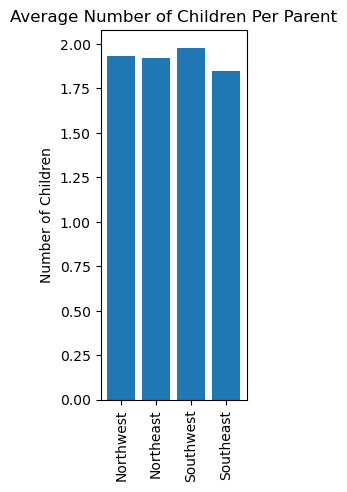

<Figure size 640x480 with 0 Axes>

In [34]:
#Calculate the number of children in each region
nw_num_children = sum(insurance_df['children'][insurance_df['region'] == 'northwest'])
ne_num_children = sum(insurance_df['children'][insurance_df['region'] == 'northeast'])
sw_num_children = sum(insurance_df['children'][insurance_df['region'] == 'southwest'])
se_num_children = sum(insurance_df['children'][insurance_df['region'] == 'southeast'])

#Calculate the number of parents in each region
nw_parents_count = len(insurance_df['children'][insurance_df['region'] == 'northwest'][insurance_df['children'] > 0])
ne_parents_count = len(insurance_df['children'][insurance_df['region'] == 'northeast'][insurance_df['children'] > 0])
sw_parents_count = len(insurance_df['children'][insurance_df['region'] == 'southwest'][insurance_df['children'] > 0])
se_parents_count = len(insurance_df['children'][insurance_df['region'] == 'southeast'][insurance_df['children'] > 0])

#Calculate the average number of children per parent in each region
nw_children_average = round(nw_num_children / nw_parents_count, 2)
ne_children_average = round(ne_num_children / ne_parents_count, 2)
sw_children_average = round(sw_num_children / sw_parents_count, 2)
se_children_average = round(se_num_children / se_parents_count, 2)

print('The average number of children per parent in the northwest region is {}.'.format(nw_children_average))
print('The average number of children per parent in the northeast region is {}.'.format(ne_children_average))
print('The average number of children per parent in the southwest region is {}.'.format(sw_children_average))
print('The average number of children per parent in the southeast region is {}.'.format(se_children_average))

#This code block is for the bar chart.
labels = ['Northwest', 'Northeast', 'Southwest', 'Southeast']
sizes = [nw_children_average, ne_children_average, sw_children_average, se_children_average]
plt.subplot(1, 3, 1)
plt.bar(labels, sizes)
plt.title('Average Number of Children Per Parent')
plt.ylabel('Number of Children')
plt.xticks(rotation=90)

plt.show()
plt.clf()


#### Region With The Highest Average Number of Patients That Smoke

In [54]:
#Calculate number of smokers for each region
nw_num_smokers = len(insurance_df['smoker'][insurance_df['region'] == 'northwest'][insurance_df['smoker'] == 'yes'])
ne_num_smokers = len(insurance_df['smoker'][insurance_df['region'] == 'northeast'][insurance_df['smoker'] == 'yes'])
sw_num_smokers = len(insurance_df['smoker'][insurance_df['region'] == 'southwest'][insurance_df['smoker'] == 'yes'])
se_num_smokers = len(insurance_df['smoker'][insurance_df['region'] == 'southeast'][insurance_df['smoker'] == 'yes'])

#Calculate number of patients for each region
nw_num_patients = len(insurance_df['region'][insurance_df['region'] == 'northwest'])
ne_num_patients = len(insurance_df['region'][insurance_df['region'] == 'northeast'])
sw_num_patients = len(insurance_df['region'][insurance_df['region'] == 'southwest'])
se_num_patients = len(insurance_df['region'][insurance_df['region'] == 'southeast'])

#Calculate the percent of patients of each region that smokes
nw_avg_num_smokers = nw_num_smokers / nw_num_patients * 100
ne_avg_num_smokers = ne_num_smokers / ne_num_patients * 100
sw_avg_num_smokers = sw_num_smokers / sw_num_patients * 100
se_avg_num_smokers = se_num_smokers / se_num_patients * 100
#print(nw_avg_num_smokers, ne_avg_num_smokers, sw_avg_num_smokers, se_avg_num_smokers)

print('The region with the highest average number of patients that smoke is the southeast region with an average of 25% of patients that smoke.')

17.846153846153847 20.679012345679013 17.846153846153847 25.0
The region with the highest average number of patients that smoke is the southeast region with an average of 25% of patients that smoke.
